In [41]:
import sklearn
print(sklearn.__version__)

0.24.2


In [42]:
import numpy as np

In [43]:
## We use make_classification() for generating dataset-- with 2 input features, 1 cluster per sample, n_classes=2 

from sklearn.datasets import make_classification

In [44]:
## Syntehetic dataset with class and one cluser per class
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [45]:
X.shape,y.shape

((1000, 2), (1000,))

In [46]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

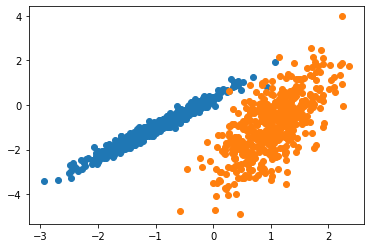

In [47]:
### Generating the actual dataset and clustering in rnage of class values

for class_value in range(2):
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


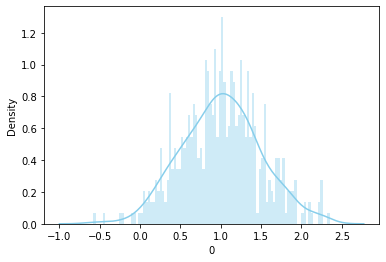

C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


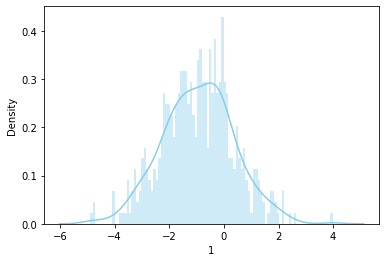

In [63]:
for x in range(2):
    sns.distplot(X[row_ix,x],
                  bins=100,
                  kde=True,
                  color='skyblue')
    plt.xlabel(x)
    plt.show()

## Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

— Clustering by Passing Messages Between Data Points, 2007.

The technique is described in the paper:

Clustering by Passing Messages Between Data Points, 2007.
It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.

In [64]:

## Implementation

In [65]:
from sklearn.cluster import AffinityPropagation

In [66]:
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [67]:
# retrieve unique clusters
clusters = np.unique(yhat)

In [69]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

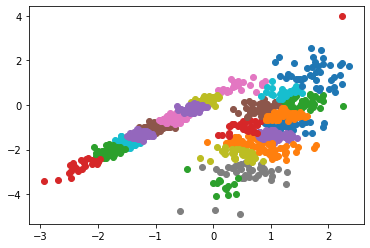

In [71]:
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
# create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

### Implementing on make_blobs

In [73]:
from sklearn.datasets import make_blobs

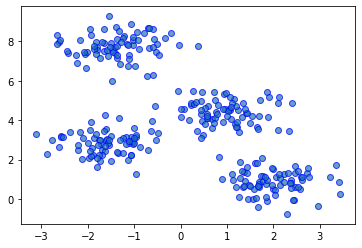

In [74]:
X, clusters = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [75]:
af = AffinityPropagation(preference=-50)
clustering = af.fit(X)

C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


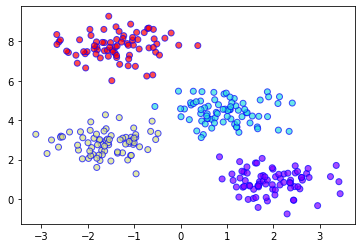

In [76]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')